In [1]:
from __future__ import absolute_import, division, print_function
import pathlib
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
import jovian

<IPython.core.display.Javascript object>

In [2]:
# version of tf
print(tf.__version__)  # 2.0.0
# download/ get  dataset using keras
# case study Auto MPG Data Set
dataset_path = tf.keras.utils.get_file("weather_data.data", "weather_data.data", untar=False, md5_hash=None, file_hash=None,
    cache_subdir='datasets', hash_algorithm='auto', extract=False,
    archive_format='auto', cache_dir=None
)
#dataset_path = keras.utils.get_file("weather_data.data", "./weather_data.data")
dataset_path

2.1.0


'C:\\Users\\Laurent\\.keras\\datasets\\weather_data.data'

In [3]:
#LAT	LON	YEAR	DOY	PRECTOT	RH2M	PS	T2M_MAX	T2M_MIN	WS2M	ALLSKY_SFC_SW_DWN 
colunm_name = [
    "LAT",
    "LON",
    "YEAR",
    "DOY",
    "PRECTOT",
    "RH2M",
    "PS",
    "T2M_MAX",
    "T2M_MIN",
    "WS2M",
    "ALLSKY_SFC_SW_DWN"
]
raw_data = pd.read_csv(dataset_path, names=colunm_name,
                       na_values="?", comment="\t", sep=" ", skipinitialspace=True)

dataset = raw_data.copy()

In [4]:
dataset #398 rows × 8 columns

,LAT,LON,YEAR,DOY,PRECTOT,RH2M,PS,T2M_MAX,T2M_MIN,WS2M,ALLSKY_SFC_SW_DWN
0,6.42621,10.79441,1990,1,0.02,68.25,88.13,26.32,15.06,0.93,22.68
1,6.42621,10.79441,1990,2,0.04,75.82,88.16,26.64,16.33,0.90,20.45
2,6.42621,10.79441,1990,3,0.02,72.69,88.18,26.72,15.41,0.88,18.07
3,6.42621,10.79441,1990,4,0.00,72.00,88.20,25.88,15.14,0.88,22.72
4,6.42621,10.79441,1990,5,0.00,59.83,88.14,25.33,15.56,0.83,22.79
...,...,...,...,...,...,...,...,...,...,...,...
10557,6.42621,10.79441,2018,331,0.01,76.92,88.11,26.22,16.51,1.52,-99.00
10558,6.42621,10.79441,2018,332,0.00,71.88,88.09,26.14,16.89,1.66,22.31
10559,6.42621,10.79441,2018,333,0.00,68.82,88.04,26.15,16.18,1.71,22.12
10560,6.42621,10.79441,2018,334,0.00,62.76,88.03,27.02,16.50,1.31,20.23


In [5]:
dataset.isna().sum() # car name -> na values 398

LAT                  0
LON                  0
YEAR                 0
DOY                  0
PRECTOT              0
RH2M                 0
PS                   0
T2M_MAX              0
T2M_MIN              0
WS2M                 0
ALLSKY_SFC_SW_DWN    0
dtype: int64

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.isna().sum()

LAT                  0
LON                  0
YEAR                 0
DOY                  0
PRECTOT              0
RH2M                 0
PS                   0
T2M_MAX              0
T2M_MIN              0
WS2M                 0
ALLSKY_SFC_SW_DWN    0
dtype: int64

In [8]:
# split data in 2 part : test and train data
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

C:\Users\Laurent\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Laurent\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


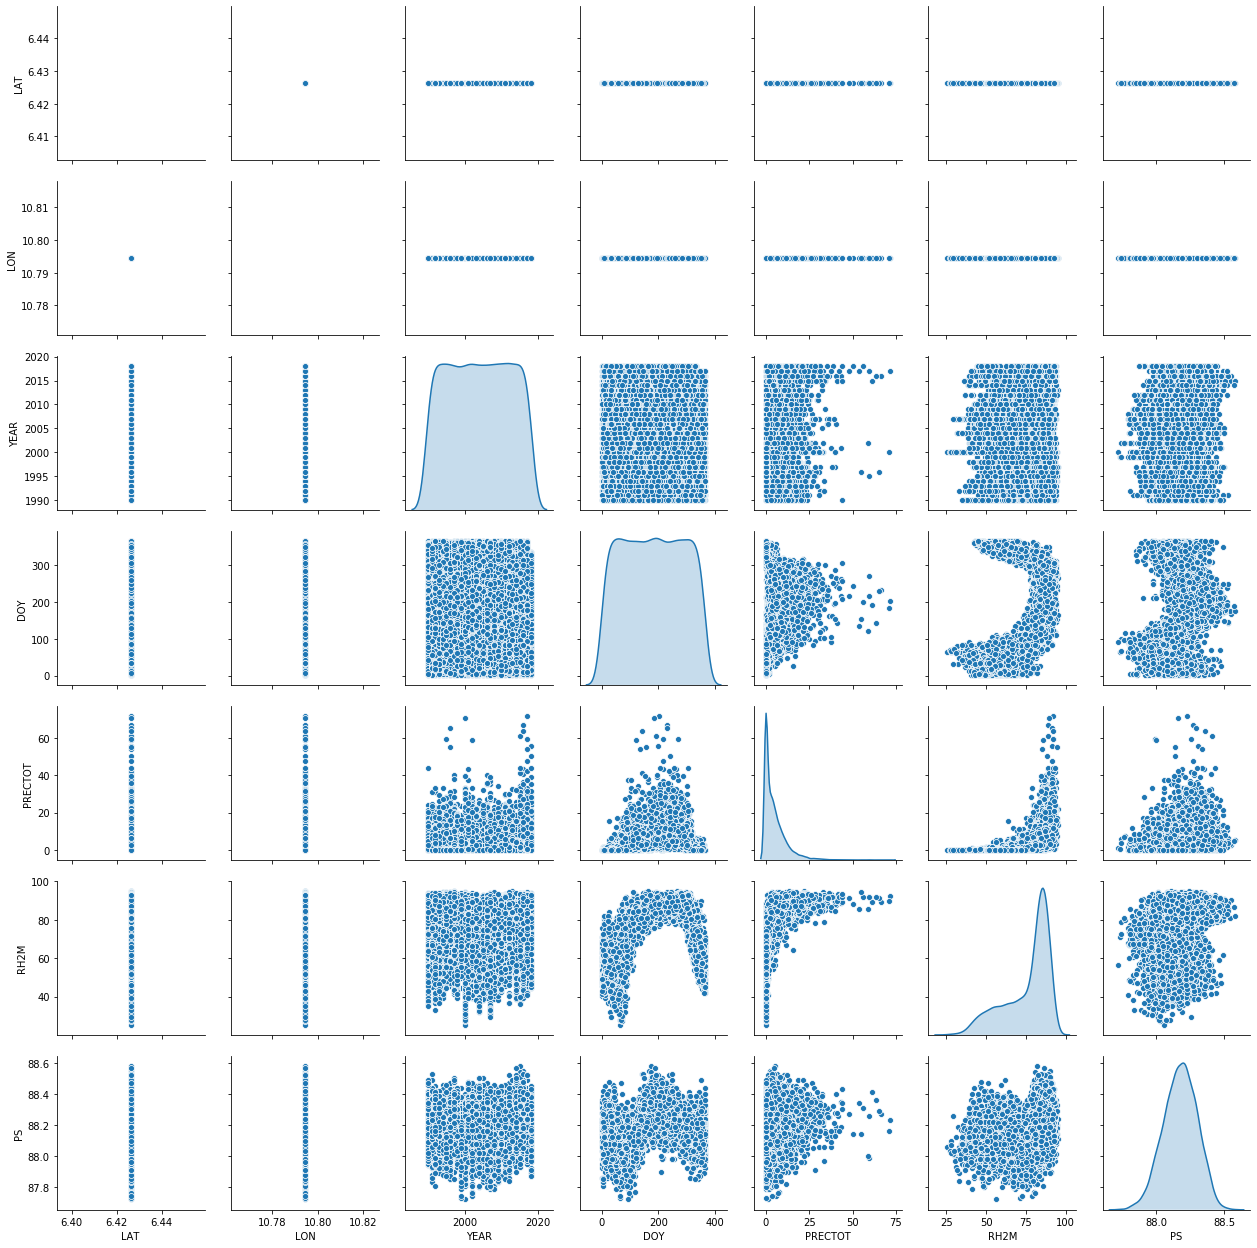

In [9]:
# TODO inspect data for well genelazation  using seaborn module(sns)
pairpt = sns.pairplot(train_dataset[["LAT",
                                     "LON",
                                     "YEAR",
                                     "DOY",
                                    "PRECTOT",
                                    "RH2M",
                                    "PS"]], diag_kind="kde")

In [10]:
# statistics of data
train_stats = dataset.describe()
train_stats

,LAT,LON,YEAR,DOY,PRECTOT,RH2M,PS,T2M_MAX,T2M_MIN,WS2M,ALLSKY_SFC_SW_DWN
count,1.056200e+04,1.056200e+04,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000
mean,6.426210e+00,1.079441e+01,2003.960235,182.645522,5.061981,75.957911,88.177082,25.642472,16.969214,1.178868,15.712742
std,5.968842e-13,1.442470e-12,8.345247,105.211170,6.619768,14.290669,0.123539,2.301040,1.514382,0.337097,18.666259
min,6.426210e+00,1.079441e+01,1990.000000,1.000000,0.000000,25.260000,87.720000,19.630000,8.100000,0.280000,-99.000000
25%,6.426210e+00,1.079441e+01,1997.000000,92.000000,0.050000,67.042500,88.090000,24.050000,16.240000,0.940000,15.370000
50%,6.426210e+00,1.079441e+01,2004.000000,183.000000,3.040000,81.895000,88.180000,25.410000,17.200000,1.160000,18.945000
75%,6.426210e+00,1.079441e+01,2011.000000,274.000000,7.460000,86.550000,88.270000,27.030000,17.950000,1.400000,21.850000
max,6.426210e+00,1.079441e+01,2018.000000,366.000000,71.650000,95.190000,88.580000,34.220000,20.920000,2.800000,28.330000


In [11]:
train_stats.pop('RH2M')
# print(train_stats)
train_stats = train_stats.transpose()

In [12]:
train_stats

,count,mean,std,min,25%,50%,75%,max
LAT,10562.0,6.426210,5.968842e-13,6.42621,6.42621,6.42621,6.42621,6.42621
LON,10562.0,10.794410,1.442470e-12,10.79441,10.79441,10.79441,10.79441,10.79441
YEAR,10562.0,2003.960235,8.345247e+00,1990.00000,1997.00000,2004.00000,2011.00000,2018.00000
DOY,10562.0,182.645522,1.052112e+02,1.00000,92.00000,183.00000,274.00000,366.00000
PRECTOT,10562.0,5.061981,6.619768e+00,0.00000,0.05000,3.04000,7.46000,71.65000
PS,10562.0,88.177082,1.235391e-01,87.72000,88.09000,88.18000,88.27000,88.58000
T2M_MAX,10562.0,25.642472,2.301040e+00,19.63000,24.05000,25.41000,27.03000,34.22000
T2M_MIN,10562.0,16.969214,1.514382e+00,8.10000,16.24000,17.20000,17.95000,20.92000
WS2M,10562.0,1.178868,3.370970e-01,0.28000,0.94000,1.16000,1.40000,2.80000
ALLSKY_SFC_SW_DWN,10562.0,15.712742,1.866626e+01,-99.00000,15.37000,18.94500,21.85000,28.33000


In [13]:
# split fature from label -> that is ours ouput you want to predicted
train_labels = train_dataset.pop('RH2M')
test_labels = test_dataset.pop('RH2M')

In [14]:
train_labels #Name: RH2M, Length: 314, dtype: float64

9097    65.87
9153    38.23
8533    86.57
2002    86.57
3900    87.93
        ...  
1883    55.45
762     51.70
2198    58.44
4885    80.98
2319    84.33
Name: RH2M, Length: 8450, dtype: float64

In [15]:
# Normalize the data
def norme(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_dataset = norme(train_dataset)
normed_test_dataset = norme(test_dataset)


In [16]:
normed_train_dataset

,LAT,LON,YEAR,DOY,PRECTOT,PS,T2M_MAX,T2M_MIN,WS2M,ALLSKY_SFC_SW_DWN
9097,0.999953,-0.999953,1.203052,1.419569,-0.764676,0.428350,0.142339,-1.379582,1.427282,0.248430
9153,0.999953,-0.999953,1.322881,-1.517382,-0.764676,-0.057326,1.815496,0.317480,1.219626,0.299324
8533,0.999953,-0.999953,1.083223,-0.471866,-0.240489,1.237810,-0.322668,0.502374,1.783262,-0.008719
2002,0.999953,-0.999953,-1.073693,-0.053659,-0.164958,1.318756,-1.013660,-0.257012,-1.272238,-0.128185
3900,0.999953,-0.999953,-0.474550,0.630679,-0.249553,0.023620,-0.865901,0.707078,-0.678937,-0.047291
...,...,...,...,...,...,...,...,...,...,...
1883,0.999953,-0.999953,-1.073693,-1.184718,-0.760145,-0.462056,1.415676,-1.207895,0.270345,0.614331
762,0.999953,-0.999953,-1.433179,-1.422335,-0.764676,-0.138272,0.972399,-1.326755,-0.204296,0.437006
2198,0.999953,-0.999953,-0.953864,-1.659952,-0.764676,0.104566,0.151031,-2.337069,0.804316,0.433255
4885,0.999953,-0.999953,-0.115064,-0.424342,-0.397594,-0.785840,0.585617,1.717391,-0.500947,0.247894


In [17]:
# build the model with kereas api
def build_model():
    model = keras.Sequential(
        [
            layers.Dense(64, activation=tf.nn.relu, input_shape=[
                         len(train_dataset.keys())]),
            layers.Dense(64, activation=tf.nn.relu),
            layers.Dense(1)

        ]
    )

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss="mse", optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [18]:
# Create a model
model = build_model()

In [19]:
# Inspect model or summarize
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [20]:
# test model with batch example
batch_examples = normed_train_dataset[:10]
example_result = model.predict(batch_examples)

In [21]:
example_result

array([[-0.19215052],
       [-0.3394286 ],
       [-0.20426805],
       [-0.07539308],
       [-0.116767  ],
       [-0.17352363],
       [-0.21067572],
       [-0.44357893],
       [-0.30268615],
       [-0.23921694]], dtype=float32)

In [22]:
# Train model and record the train in table and histogram


class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')
#manage simple overfitting
early_stop = keras.callbacks.EarlyStopping(monitor ='val_loss',patience=30)

In [23]:
EPOCHS = 1000
# use 20% for validation
history = model.fit(normed_train_dataset,
                    train_labels,
                    epochs=EPOCHS,Y
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[early_stop,PrintDot()])


....................................................................................................
...................................................................................

In [24]:
# visualize progress of traning model using statsin history objects
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
178,15.197258,2.659904,15.197258,19.011724,2.976323,19.011724,178
179,15.300935,2.674674,15.300932,18.501263,2.831211,18.501263,179
180,15.223527,2.655973,15.223530,23.327635,3.379651,23.327635,180
181,15.192047,2.654676,15.192043,20.913856,3.287161,20.913857,181
182,15.252264,2.668421,15.252263,19.473876,3.018772,19.473877,182


In [25]:
# plot progress in histogram

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [RH2M]')
    plt.plot(hist['epoch'],
             hist['mae'],
             label='Train error'
             )
    plt.plot(hist['epoch'],
             hist['val_mae'],
             label='Val error'
             )
    plt.legend()
    plt.ylim([0, 20])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [RH2M]')
    plt.plot(hist['epoch'],
             hist['mse'],
             label='Train error'
             )
    plt.plot(hist['epoch'],
             hist['val_mse'],
             label='Val error'
             )
    plt.legend()
    plt.ylim([0, 20])
    
   

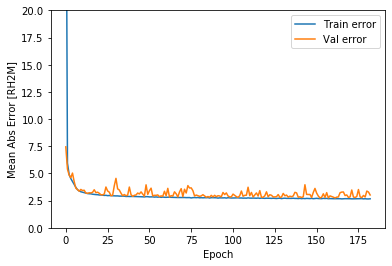

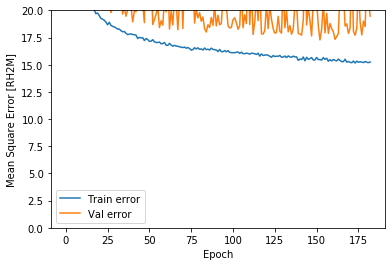

In [26]:
plot_history(history)

In [27]:
#test performing
loss,mae,mse = model.evaluate(normed_test_dataset,
                              test_labels,
                              verbose = 0
                              )
print("Testing set Mean Absolute Error: {:5.2f}  RH2M".format(mae))


Testing set Mean Absolute Error:  2.96  RH2M


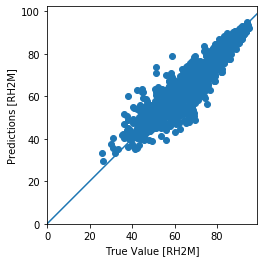

In [28]:
#make prediction use data test data, visualize matching to trrue value
test_predictions = model.predict(normed_test_dataset).flatten()

plt.scatter(test_labels,test_predictions)
plt.xlabel('True Value [RH2M]')
plt.ylabel('Predictions [RH2M]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ =plt.plot([-100,100],[-100,100])
plt.show()

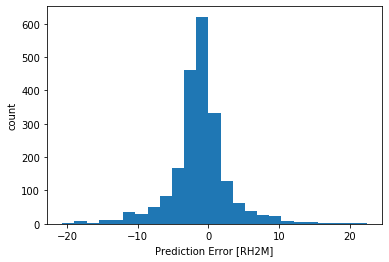

In [31]:
#Error distribution
error = test_predictions - test_labels
plt.hist(error,bins=25)
plt.xlabel('Prediction Error [RH2M]')
plt.ylabel("count")

plt.show()#not quite guassian , but it expected because you have small data

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
